# Sarwarish Upadhyay
# Simple implementation of Decision Tree algorithm

In [ ]:
#Data-Set Link : https://www.google.com/url?sa=D&q=https://bit.ly/3kXTdox&ust=1608643620000000&usg=AOvVaw36TEoHs7cIkkFctTyilq0m&hl=en

In [23]:
import numpy as np # linear algebra
import pandas as pd


**Displaying the sample data**

In [24]:
df = pd.read_csv('/content/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [25]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

**Looking out for the Null Values**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Dropping out the unnecessary columns**

In [27]:
df= df.drop(['Id'],axis=1)

**Types of lables to be predicted**

In [28]:
df['Species'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [29]:
df['Species'].value_counts()


Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

**Separating out the features and lables/target**

In [30]:

features  = list(df.columns)[:-1]
print(features)
target = list(df.columns)[-1:][0]
print(target)

# Features  --- > Predictor 
# Target  --> Predicted

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Species


**Plotting the pairplot**

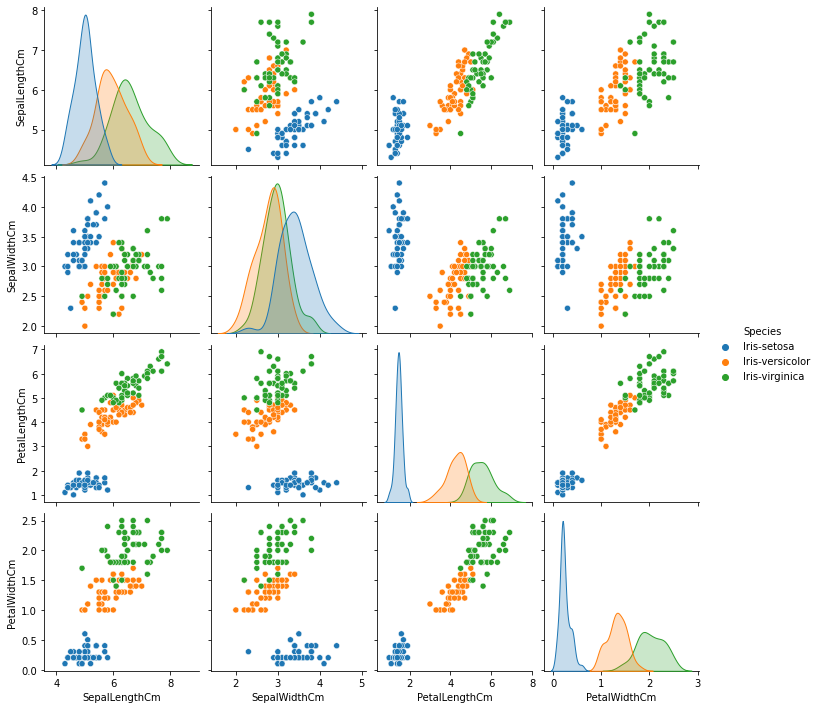

In [31]:
import seaborn as sns
sns.pairplot(df,hue ='Species')

In [32]:
# Separates features and corresponding labels/target 
# by dropping Species - we get data frame with all features 

X = df.drop(['Species'], axis=1)  #  X will hold all features
y = df['Species'] # y will hold target/labels

print(X.shape) #dimensions of input data
print(y.shape) #dimensions of output data

(150, 4)
(150,)


**The train test split**

In [33]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.5, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(75, 4)
(75, 4)


**Creating the model and fitting the training data**

In [34]:
# Training using Decision Tree Classifier 

from sklearn.tree import DecisionTreeClassifier  
classifier1 = DecisionTreeClassifier(criterion='gini')  
print('Model prepared')
classifier1.fit(X_train, y_train) 
print('Trining data has been fitted')
print(classifier1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


**Predicting the test data using the model trained above**

In [35]:
y_pred_1 = classifier1.predict(X_test)  
print(y_pred_1)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-

In [36]:
from sklearn.metrics import accuracy_score #importing accuracy_score function from sklearn.metrics package
acc_1 = accuracy_score(y_test,y_pred_1)
print("Accuracy for Gini model {} %".format(acc_1*100))

Accuracy for Gini model 96.0 %


**Creating the confusion matrix to describe the performance of a classification model**

In [37]:
# confusion matrix for Gini Model 


from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred_1))
print(classification_report(y_test, y_pred_1)) 

[[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       0.94      0.97      0.95        30
 Iris-virginica       0.96      0.92      0.94        24

       accuracy                           0.96        75
      macro avg       0.96      0.96      0.96        75
   weighted avg       0.96      0.96      0.96        75



In [38]:
# important features 

print(classifier1.feature_importances_)


[0.         0.02696872 0.38374458 0.5892867 ]


**Visualising the tree model prepared**

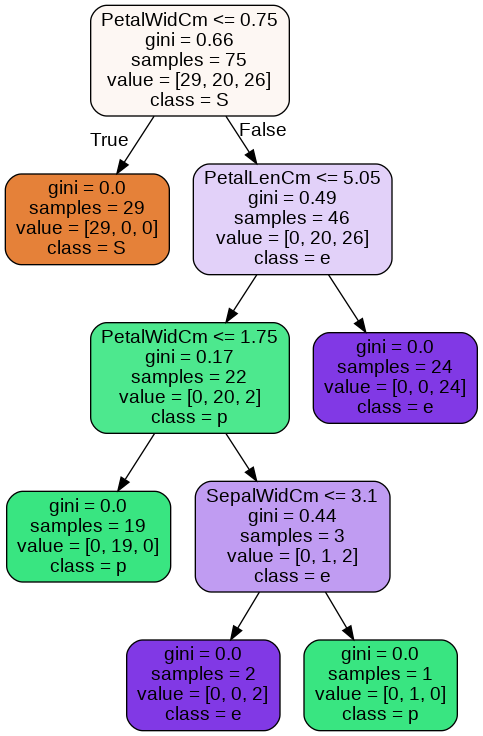

In [39]:
 #Plot a tree 


from sklearn import tree
from sklearn.tree import export_graphviz

tree.export_graphviz(classifier1,out_file='tree.dot',feature_names = ['SepalLenCm','SepalWidCm','PetalLenCm', 'PetalWidCm'],
class_names = 'Species',rounded = True, proportion = False, precision = 2, filled = True)  

!dot -Tpng tree.dot -o tree.png
from IPython.display import Image
Image(filename = 'tree.png')

#                                                   Thank YOU